In [2]:
import pandas as pd
import plotly.express as px
import numpy as np

In [6]:
df = px.data.tips()
df.sample(4)

,total_bill,tip,sex,smoker,day,time,size
26,13.37,2.00,Male,No,Sat,Dinner,2
155,29.85,5.14,Female,No,Sun,Dinner,5
47,32.40,6.00,Male,No,Sun,Dinner,4
32,15.06,3.00,Female,No,Sat,Dinner,2


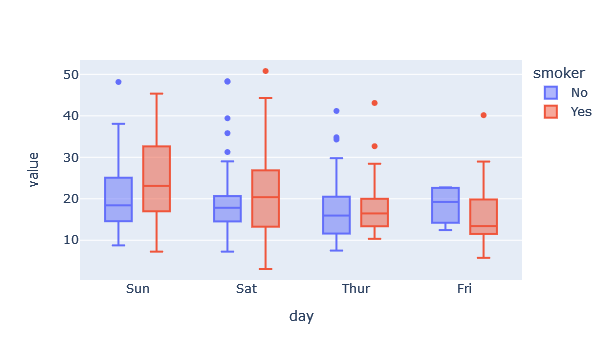

In [14]:
fig = px.box(df, x="day",y="["total_bill"]", color="smoker")
fig

In [21]:
# Read json.
df1 = pd.read_json("students_grades_1.json")
df2 = pd.read_json("students_grades_2.json")
# Concatenate DataFrames.
df_grades = pd.concat(objs=[df1, df2], axis=0, ignore_index=True)
df_grades.sample(3)

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
644,Catalina Brooks,female,group C,some college,standard,none,4.24,3.88,4.12
93,Robert Miranda,male,group C,high school,free/reduced,none,4.24,5.32,4.54
397,Gloria Bradford,female,group B,high school,standard,none,4.24,4.84,5.08


In [5]:
df_grades.sample(3)

,names,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
728,Kimberly Routzahn,female,group C,master's degree,free/reduced,none,4.12,4.90,4.66
234,Lawrence Cormier,male,group B,associate's degree,standard,none,4.90,4.24,4.42
759,Jane Larson,female,group B,bachelor's degree,standard,none,4.66,5.32,5.20


In [7]:
df_grades.melt(value_vars=["math score", "writing score", "reading score"],
              var_name="subject",
              value_name="score").tail()


,subject,score
2620,reading score,5.50
2621,reading score,3.64
2622,reading score,5.44
2623,reading score,4.66
2624,reading score,5.80


In [13]:
dates = pd.date_range(start='2021-10-01', periods=10, freq='Y')
df_date = pd.DataFrame({"values":range(10)}, index=dates)
df_date.groupby(by=lambda d: d.year).count()


,values
2021,1
2022,1
2023,1
2024,1
2025,1
2026,1
2027,1
2028,1
2029,1
2030,1


In [20]:
df_test = pd.DataFrame({"hola": range(5), "adios": np.array(range(5)) * 2 + 100})
df_test["hola"] = df_test["hola"].astype("category")
print(df_test.info())
df_test

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   hola    5 non-null      category
 1   adios   5 non-null      int32   
dtypes: category(1), int32(1)
memory usage: 353.0 bytes
None


,hola,adios
0,0,100
1,1,102
2,2,104
3,3,106
4,4,108


In [25]:
df_ = df_grades.copy()

# Category series
df_["race/ethnicity"] = df_["race/ethnicity"].astype(dtype="category")
df_["parental level of education"] = df_["parental level of education"].astype(dtype="category")

# Use serie's method map().
map_dict = {"some high school": "school",
           "some college": "school",
           "high school": "school",
           "bachelor's degree": "college",
           "associate's degree": "college",
           "master's degree": "postgraduate"}

# Simplify "parental level of education" values.
df_["parental level of education"] = df_["parental level of education"].map(map_dict)
# Group by
df_.groupby(by=["race/ethnicity", "parental level of education"]).mean().reset_index()

,race/ethnicity,parental level of education,math score,reading score,writing score
0,group A,college,4.735000,5.005000,4.890000
1,group A,postgraduate,4.690000,5.230000,5.350000
2,group A,school,4.568235,4.725882,4.558824
3,group B,college,5.070000,5.264444,5.192222
4,group B,postgraduate,4.912000,5.692000,5.548000
5,group B,school,4.689159,4.887664,4.764299
6,group C,college,5.021765,5.370588,5.354706
7,group C,postgraduate,4.924000,5.144000,5.104000
8,group C,school,4.764516,5.023871,4.919355
9,group D,college,5.108286,5.248000,5.248857
